In [89]:
import pandas as pd
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from deep_translator import GoogleTranslator

import pandas as pd
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from collections import Counter

In [44]:
# This dataframe has only the articles about mental health those which are related to social networks.
df = pd.read_csv('./3_preprocessed_data.csv')

# Drop the unnecessary 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)
df.describe(include='all')

,news_site,tstamp,title,text,linkToNoFrame,linkToArchive
count,701,7.010000e+02,700,701,701,701
unique,2,NaN,655,655,700,700
top,observador.pt,NaN,"Filhos em casa, teletrabalho, saúde mental e p...",6h40. Vou levantar-me já para acabar o relatór...,https://arquivo.pt/noFrame/replay/202003190340...,https://arquivo.pt/wayback/20200319034042/http...
freq,667,NaN,3,3,2,2
mean,NaN,2.018180e+13,NaN,NaN,NaN,NaN
std,NaN,1.865672e+10,NaN,NaN,NaN,NaN
min,NaN,2.009122e+13,NaN,NaN,NaN,NaN
25%,NaN,2.017062e+13,NaN,NaN,NaN,NaN
50%,NaN,2.019021e+13,NaN,NaN,NaN,NaN
75%,NaN,2.020031e+13,NaN,NaN,NaN,NaN


In [86]:
mental_health_terms = ['saude mental', 'saúde mental', 'depressão', 'ansiedade', 'burnout', 'anorexia', 'bulimia', 'esquizofrenia']

In [8]:
# Load the Portuguese model
nlp = spacy.load('pt_core_news_sm')

def split_text(text, chunk_size=2500):
        return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)][:5]

def calculate_sentiment(text):
    pt_text = split_text(text)

    en_text = []
    for chunk in pt_text:
        traducao = GoogleTranslator(source='pt', target='en').translate(chunk)
        en_text.append(traducao)
    text_en = "".join([text for text in en_text if text is not None])

    # Initialize VADER and TextBlob
    analyzer = SentimentIntensityAnalyzer()
    blob = TextBlob(text_en)

    # Get VADER and TextBlob sentiment scores
    vader_scores = analyzer.polarity_scores(text_en)
    textblob_sentiment = blob.sentiment
    return vader_scores["compound"] * 0.6 + textblob_sentiment.polarity * 0.4

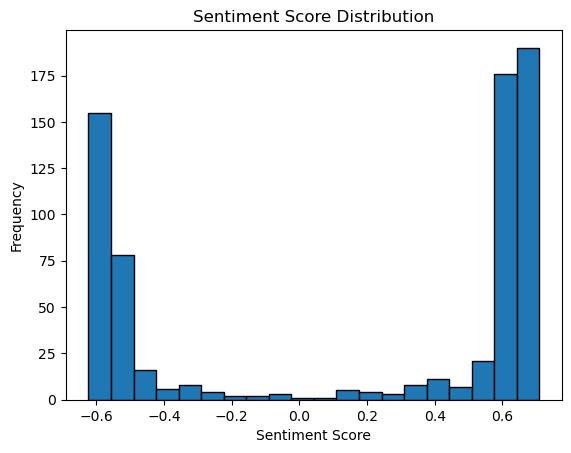

In [13]:
sentiments=[]
for i in range(df.shape[0]):
    sentiments.append(calculate_sentiment(df.loc[i, 'text']))
    
import matplotlib.pyplot as plt
plt.hist(sentiments, bins=20, edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()

In [58]:
df['sentiment'] = sentiments

# Define a function to categorize sentiment scores
def categorize_sentiment(score):
    if score >= 0.5:
        return 'good'
    elif score <= - 0.5:
        return 'bad'
    else:
        return 'neutral'

# Apply the function to the sentiment column to create a new column with categories
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

In [59]:
# Remove the last two characters from the tstamp column
df['datetime'] = df['tstamp'].astype(str).str[:-2]

# Convert tstamp to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')
df.head()


,news_site,tstamp,title,text,linkToNoFrame,linkToArchive,datetime,sentiment,sentiment_category
0,publico.pt,20190410191430,"Harry, Meghan e Oprah juntos para uma série so...",Harry e Meghan anunciaram nesta quarta-feira o...,https://arquivo.pt/noFrame/replay/201904101914...,https://arquivo.pt/wayback/20190410191430/http...,2019-04-10 19:14:00,0.665570,good
1,publico.pt,20110701010626,Programa do XIX Governo Constitucional - Polít...,- Garantindo aos ex‐combatentes a manutenção d...,https://arquivo.pt/noFrame/replay/201107010106...,https://arquivo.pt/wayback/20110701010626/http...,2011-07-01 01:06:00,0.648769,good
2,publico.pt,20180803172219,"Óbito | Morreu Rick Genest, o modelo conhecido...","Aos 32 anos, Rick Genest (1985-2018) foi encon...",https://arquivo.pt/noFrame/replay/201808031722...,https://arquivo.pt/wayback/20180803172219/http...,2018-08-03 17:22:00,0.495798,neutral
3,publico.pt,20181113184825,"Incêndios | Miley Cyrus, Neil Young entre os q...",Os cantores Miley Cyrus e Neil Young estão ent...,https://arquivo.pt/noFrame/replay/201811131848...,https://arquivo.pt/wayback/20181113184825/http...,2018-11-13 18:48:00,-0.574643,bad
4,publico.pt,20181203192427,Empreendedorismo | (Mulheres + “Startups”) x S...,Se abrir uma empresa de tecnologia é uma taref...,https://arquivo.pt/noFrame/replay/201812031924...,https://arquivo.pt/wayback/20181203192427/http...,2018-12-03 19:24:00,0.662933,good


In [72]:
good_df = df[df['sentiment_category'] == 'good']
bad_df = df[df['sentiment_category'] == 'bad']
neutral_df = df[df['sentiment_category'] == 'neutral']

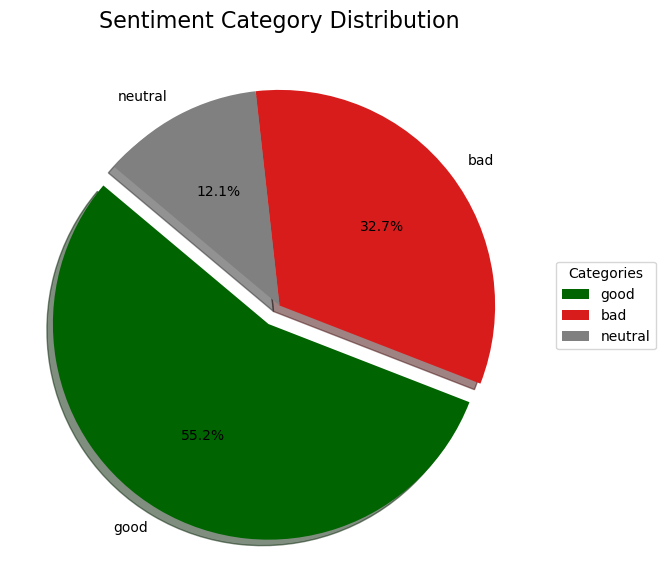

In [99]:
# Count the occurrences of each category
category_counts = df['sentiment_category'].value_counts()

# Define custom colors
colors = ['#006400', '#d81c1c', '#808080']

# Define explode values to highlight the 'good' category
explode = (0.1, 0, 0)  # Explode the first slice (good)

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Sentiment Category Distribution', fontsize=16)
plt.legend(category_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

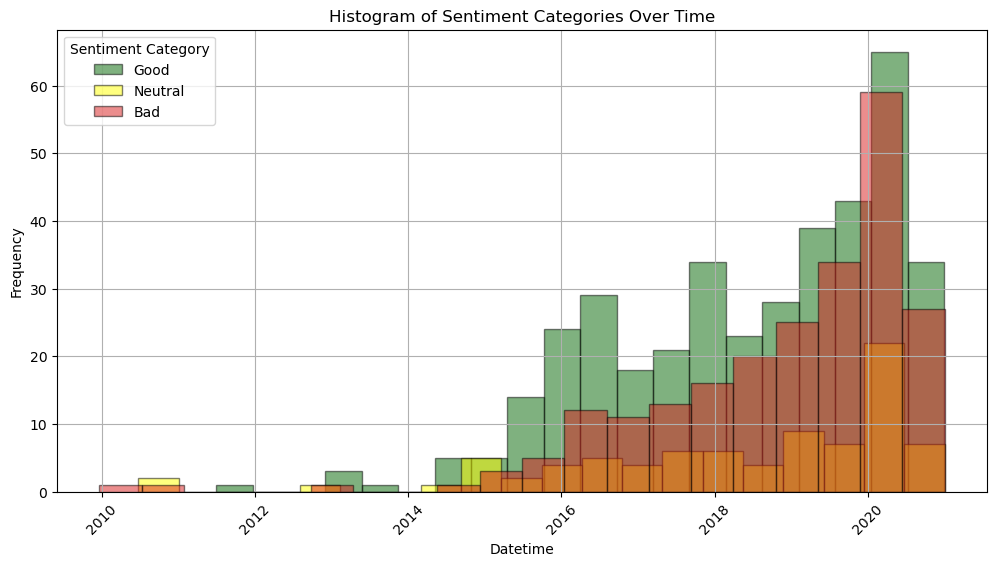

In [104]:
# Plot the histograms for each category on the same plot
plt.figure(figsize=(12, 6))
plt.hist(good_df['datetime'], bins=20, alpha=0.5, label='Good', color='#006400', edgecolor='black')
plt.hist(neutral_df['datetime'], bins=20, alpha=0.5, label='Neutral', color='yellow', edgecolor='black')
plt.hist(bad_df['datetime'], bins=20, alpha=0.5, label='Bad', color='#d81c1c', edgecolor='black')

plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Categories Over Time')
plt.legend(title='Sentiment Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [91]:
df.head()

,news_site,tstamp,title,text,linkToNoFrame,linkToArchive,datetime,sentiment,sentiment_category,year,most_frequent_term
0,publico.pt,20190410191430,"Harry, Meghan e Oprah juntos para uma série so...",Harry e Meghan anunciaram nesta quarta-feira o...,https://arquivo.pt/noFrame/replay/201904101914...,https://arquivo.pt/wayback/20190410191430/http...,2019-04-10 19:14:00,0.665570,good,2019,None
1,publico.pt,20110701010626,Programa do XIX Governo Constitucional - Polít...,- Garantindo aos ex‐combatentes a manutenção d...,https://arquivo.pt/noFrame/replay/201107010106...,https://arquivo.pt/wayback/20110701010626/http...,2011-07-01 01:06:00,0.648769,good,2011,None
2,publico.pt,20180803172219,"Óbito | Morreu Rick Genest, o modelo conhecido...","Aos 32 anos, Rick Genest (1985-2018) foi encon...",https://arquivo.pt/noFrame/replay/201808031722...,https://arquivo.pt/wayback/20180803172219/http...,2018-08-03 17:22:00,0.495798,neutral,2018,None
3,publico.pt,20181113184825,"Incêndios | Miley Cyrus, Neil Young entre os q...",Os cantores Miley Cyrus e Neil Young estão ent...,https://arquivo.pt/noFrame/replay/201811131848...,https://arquivo.pt/wayback/20181113184825/http...,2018-11-13 18:48:00,-0.574643,bad,2018,None
4,publico.pt,20181203192427,Empreendedorismo | (Mulheres + “Startups”) x S...,Se abrir uma empresa de tecnologia é uma taref...,https://arquivo.pt/noFrame/replay/201812031924...,https://arquivo.pt/wayback/20181203192427/http...,2018-12-03 19:24:00,0.662933,good,2018,None


In [95]:
# Extract the year from the datetime column
df['year'] = df['datetime'].dt.year

# Function to find the most frequent mental health term in a text
def most_frequent_mental_health_term(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word in mental_health_terms]
    if filtered_words:
        return Counter(filtered_words).most_common(1)[0][0]
    return None

# Apply the function to find the most frequent mental health term for each text
df['most_frequent_term'] = df['text'].apply(most_frequent_mental_health_term)

# Group by year and find the most frequent term and its average sentiment
def get_most_frequent_term_and_sentiment(group):
    if not group['most_frequent_term'].mode().empty:
        most_frequent_term = group['most_frequent_term'].mode()[0]
        average_sentiment = group.loc[group['most_frequent_term'] == most_frequent_term, 'sentiment'].mean()
        return pd.Series({'most_frequent_term': most_frequent_term, 'average_sentiment': average_sentiment})
    else:
        return pd.Series({'most_frequent_term': None, 'average_sentiment': None})

result = df.groupby('year').apply(get_most_frequent_term_and_sentiment)

# Display the result
print(result)

     most_frequent_term  average_sentiment
year                                      
2009          ansiedade          -0.546837
2010           anorexia           0.389507
2011               None                NaN
2013          ansiedade           0.677476
2014          ansiedade           0.157135
2015          ansiedade           0.431590
2016          ansiedade           0.288665
2017          ansiedade           0.298689
2018          depressão           0.158386
2019          ansiedade           0.264363
2020          ansiedade           0.247372


    year mental_health_terms  sentiment
0   2009           ansiedade  -0.546837
1   2009           depressão  -0.546837
2   2010            anorexia   0.389507
3   2010           depressão  -0.597445
4   2013           ansiedade   0.677476
5   2013           depressão   0.244216
6   2014           ansiedade   0.327946
7   2014           depressão  -0.463454
8   2014       esquizofrenia   0.651100
9   2015            anorexia   0.629361
10  2015           ansiedade   0.169378
11  2015             burnout  -0.566809
12  2015           depressão  -0.105148
13  2015       esquizofrenia   0.173599
14  2016            anorexia   0.158236
15  2016           ansiedade   0.282793
16  2016             burnout   0.630309
17  2016           depressão  -0.262347
18  2016       esquizofrenia   0.540412
19  2017           ansiedade   0.213275
20  2017             bulimia  -0.566558
21  2017             burnout  -0.258863
22  2017           depressão  -0.246720
23  2017       esquizofrenia   0.691752


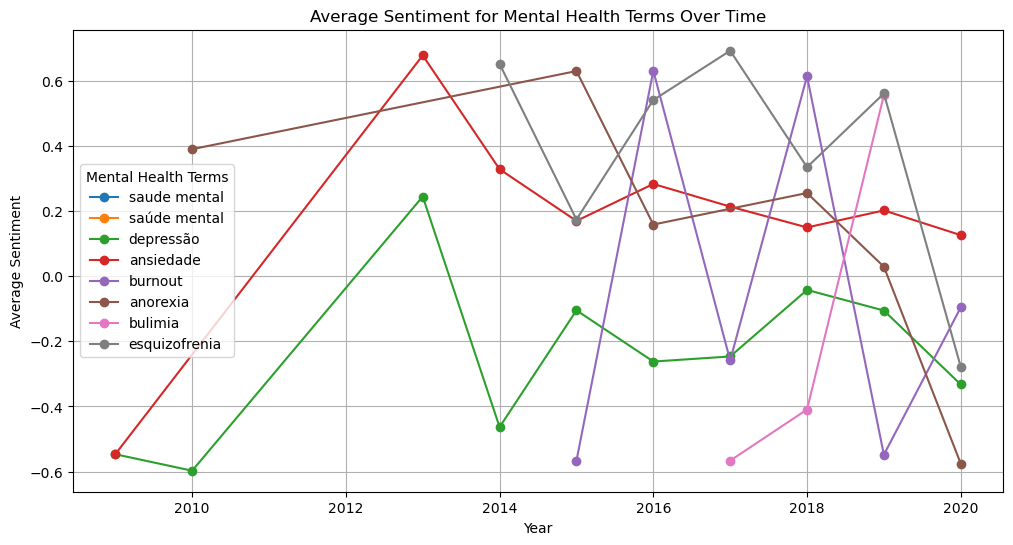

In [111]:
# Function to find mental health terms in a text
def find_mental_health_terms(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word in mental_health_terms]
    return filtered_words

# Apply the function to find mental health terms for each text
df['mental_health_terms'] = df['text'].apply(find_mental_health_terms)

# Explode the DataFrame to have one term per row
df_exploded = df.explode('mental_health_terms')

# Group by year and mental health term, and calculate the average sentiment
result = df_exploded.groupby(['year', 'mental_health_terms'])['sentiment'].mean().reset_index()

# Display the result
print(result)
# Plot the data with a line for each mental health term
plt.figure(figsize=(12, 6))
for term in mental_health_terms:
    term_data = result[result['mental_health_terms'] == term]
    plt.plot(term_data['year'], term_data['sentiment'], marker='o', label=term)

plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment for Mental Health Terms Over Time')
plt.legend(title='Mental Health Terms')
plt.grid(True)
plt.show()

    year social_net_terms  sentiment
0   2010         facebook   0.389507
1   2013         facebook   0.654388
2   2013          twitter   0.679245
3   2014         facebook  -0.001626
4   2014          twitter   0.650935
5   2015         facebook   0.433098
6   2015        instagram   0.652453
7   2015          twitter  -0.522720
8   2016         facebook   0.363952
9   2016        instagram   0.394750
10  2016          twitter   0.106697
11  2017         facebook   0.088848
12  2017        instagram   0.302099
13  2017         linkedin   0.655001
14  2017          twitter   0.120921
15  2018         facebook   0.237827
16  2018        instagram   0.430865
17  2018          twitter   0.008318
18  2019         facebook   0.218607
19  2019        instagram   0.344866
20  2019         linkedin   0.652539
21  2019          twitter   0.252890
22  2020         facebook  -0.098677
23  2020        instagram   0.223997
24  2020          twitter  -0.289782


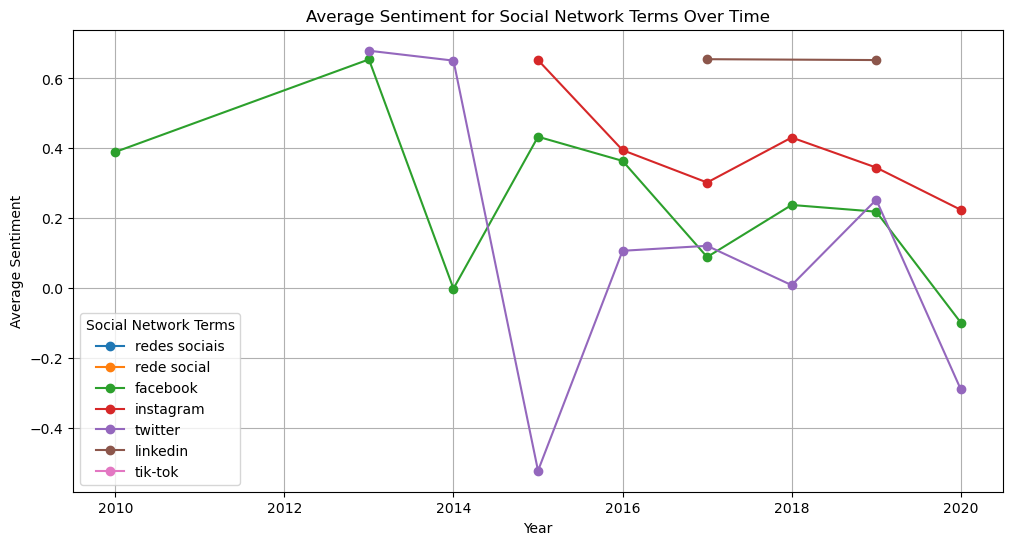

In [113]:
# List of social network terms (replace this with your actual list)
social_net_terms = ['redes sociais', 'rede social', 'facebook', 'instagram', 'twitter', 'linkedin', 'tik-tok']

# Remove the last two characters from the tstamp column
df['datetime'] = df['tstamp'].astype(str).str[:-2]

# Convert tstamp to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')

# Extract the year from the datetime column
df['year'] = df['datetime'].dt.year

# Function to find social network terms in a text
def find_social_net_terms(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word in social_net_terms]
    return filtered_words

# Apply the function to find social network terms for each text
df['social_net_terms'] = df['text'].apply(find_social_net_terms)

# Explode the DataFrame to have one term per row
df_exploded = df.explode('social_net_terms')

# Group by year and social network term, and calculate the average sentiment
result = df_exploded.groupby(['year', 'social_net_terms'])['sentiment'].mean().reset_index()

# Display the result
print(result)

# Plot the data with a line for each social network term
plt.figure(figsize=(12, 6))
for term in social_net_terms:
    term_data = result[result['social_net_terms'] == term]
    plt.plot(term_data['year'], term_data['sentiment'], marker='o', label=term)

plt.xlabel('Year')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment for Social Network Terms Over Time')
plt.legend(title='Social Network Terms')
plt.grid(True)
plt.show()

In [114]:
df

,news_site,tstamp,title,text,linkToNoFrame,linkToArchive,datetime,sentiment,sentiment_category,year,most_frequent_term,mental_health_terms,social_net_terms
0,publico.pt,20190410191430,"Harry, Meghan e Oprah juntos para uma série so...",Harry e Meghan anunciaram nesta quarta-feira o...,https://arquivo.pt/noFrame/replay/201904101914...,https://arquivo.pt/wayback/20190410191430/http...,2019-04-10 19:14:00,0.665570,good,2019,None,[],[instagram]
1,publico.pt,20110701010626,Programa do XIX Governo Constitucional - Polít...,- Garantindo aos ex‐combatentes a manutenção d...,https://arquivo.pt/noFrame/replay/201107010106...,https://arquivo.pt/wayback/20110701010626/http...,2011-07-01 01:06:00,0.648769,good,2011,None,[],[]
2,publico.pt,20180803172219,"Óbito | Morreu Rick Genest, o modelo conhecido...","Aos 32 anos, Rick Genest (1985-2018) foi encon...",https://arquivo.pt/noFrame/replay/201808031722...,https://arquivo.pt/wayback/20180803172219/http...,2018-08-03 17:22:00,0.495798,neutral,2018,None,[],[]
3,publico.pt,20181113184825,"Incêndios | Miley Cyrus, Neil Young entre os q...",Os cantores Miley Cyrus e Neil Young estão ent...,https://arquivo.pt/noFrame/replay/201811131848...,https://arquivo.pt/wayback/20181113184825/http...,2018-11-13 18:48:00,-0.574643,bad,2018,None,[],[twitter]
4,publico.pt,20181203192427,Empreendedorismo | (Mulheres + “Startups”) x S...,Se abrir uma empresa de tecnologia é uma taref...,https://arquivo.pt/noFrame/replay/201812031924...,https://arquivo.pt/wayback/20181203192427/http...,2018-12-03 19:24:00,0.662933,good,2018,None,[],[facebook]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,observador.pt,20180425043612,"E fora das redes sociais, Umberto Eco? – Obser...",Umberto Eco queixou-se há dias que as redes so...,https://arquivo.pt/noFrame/replay/201804250436...,https://arquivo.pt/wayback/20180425043612/http...,2018-04-25 04:36:00,0.648319,good,2018,None,[],[]
697,observador.pt,20170815184721,"Foi há 20 anos. Afinal, o que falta saber sobr...",Três novos documentários revêem a vida íntima ...,https://arquivo.pt/noFrame/replay/201708151847...,https://arquivo.pt/wayback/20170815184721/http...,2017-08-15 18:47:00,-0.566558,bad,2017,bulimia,"[depressão, bulimia, bulimia, bulimia, bulimia...",[]
698,observador.pt,20200224181953,Grimes fez um disco para dançar até ao fim do ...,Existem poucas coisas mais 2020 que Grimes. E ...,https://arquivo.pt/noFrame/replay/202002241819...,https://arquivo.pt/wayback/20200224181953/http...,2020-02-24 18:19:00,-0.547248,bad,2020,esquizofrenia,"[esquizofrenia, esquizofrenia]","[instagram, instagram]"
699,observador.pt,20200101185454,Interfaces entre cérebro e máquina: os super-h...,"Publicado em 1984 por William Gibson, “Neuroma...",https://arquivo.pt/noFrame/replay/202001011854...,https://arquivo.pt/wayback/20200101185454/http...,2020-01-01 18:54:00,0.556967,good,2020,esquizofrenia,[esquizofrenia],[facebook]
